# Methods of Advanced Data Engineering Report
## Relation Between Housing Prices and the Ease of Obtaining a Construction Permit

### Introduction

This final report for the MADE project **Relation Between Housing Prices and the Ease of Obtaining a Construction Permit**, which explored datasets [*Doing Business*](https://datacatalog.worldbank.org/search/dataset/0038564/Doing-Business) from the [World Bank](https://www.worldbank.org/) and [*Analytical house price indicators*](https://www.oecd-ilibrary.org/economics/data/prices/analytical-house-price-indicators_cbcc2905-en) from the statistical department of the [OECD](https://www.oecd.org/). The project analyses relation between the *Doing Business* indicators and the *Analytical house price indicators*

Specifically the projects focuses on the possible correlation between the indicator *Dealing with construction permits - Score* of the **Doing Business** dataset and the indicator *Nominal house price index* of the **Analytical house price indicators**.

Our hypothesis is the *Dealing with construction permits - Score*, which measures the ease of obtaining a construction permit will (negatively) correlate with the *Nominal house price index*. In other words, we expect housing prices going down with high construction permits score values (easy to obtain a permit) and going up with low construction permits values (hard to obtain a permit).

The intuition behind this hypothesis is that increased effort into obtaining a building permit yields an increases risk, time and monetary costs for developers, which in turn may lower the number of developer projects - decreasing the supply of housing or the developer may transfer the risk and increased cost into the housing price for the final customer.

#### Goal

The goal is to answer the main project question:
##### Do housing prices correlate with the ease/difficulty of obtaining a construction permit?

### Methods

This projects uses 2 data sources:

#### [*Doing Business*](https://datacatalog.worldbank.org/search/dataset/0038564/Doing-Business):
**Description:**
> The Doing Business project provides objective measures of business regulations and their enforcement across 190 economies. Economies are ranked on their ease of doing business, from 1–190. The rankings are determined by sorting the aggregate scores (formerly called distance to frontier) on 10 topics, each consisting of several indicators, giving equal weight to each topic.

This data source measures different indicators of business regulations over time and countries.

**Indicators:**
* Enforcing contracts: Alternative dispute resolution (0-3) (DB16-20 methodology)
* Enforcing contracts: Attorney fees (% of claim)
* Enforcing contracts: Cost (% of claim)
* Enforcing contracts: Cost (% of claim) - Score
* Enforcing contracts: Case management (0-6) (DB16-20 methodology)
* Enforcing contracts: Court automation (0-4) (DB17-20 methodology)
* Enforcing contracts: Court fees (% of claim)
* Enforcing contracts: Court structure and proceedings (0-5) (DB16 methodology)
* Enforcing contracts: Court structure and proceedings (0-5) (DB17-20 methodology)
* Enforcing contracts (DB04-15 methodology) - Score
* Enforcing contracts (DB16 methodology) - Score
* Enforcing contracts (DB17-20 methodology) - Score
* Enforcing contracts: Enforcement fees (% of claim)
* Enforcing contracts: Enforcement of judgment (days)
* Enforcing contracts: Filing and service (days)
* Enforcing contracts: Procedures (number)
* Enforcing contracts: Procedures (number) - Score
* Enforcing contracts: Quality of the judicial processes index (0-19) (DB17-20 methodology) - Score
* Enforcing contracts: Quality of judicial processes index (0-19) (DB17-19 methodology) - Score
* Enforcing contracts: Quality of the judicial processes index (0-18) (DB17-20 methodology)
* Rank: Enforcing contracts (1=most business-friendly regulations)
* Enforcing contracts: Trial and judgment (days)
* Enforcing contracts: Time (days)
* Enforcing contracts: Time (days) - Score
* Enforcing contracts: Quality of judicial administration index (0-18) (DB17-19 methodology)
* Global: Ease of doing business score (DB10-14 methodology)
* Ease of doing business score (DB15 methodology)
* Global: Ease of doing business score (DB15 methodology)
* Global: Ease of doing business score (DB17-20 methodology)
* Ease of doing business rank (1=most business-friendly regulations)
* Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-20 methodology)
* Dealing with construction permits: Professional certifications index (0-4) (DB16-20 methodology)
* Dealing with construction permits: Building quality control index (0-15) (DB16-20 methodology) - Score
* Dealing with construction permits: Cost (% of Warehouse value)
* Dealing with construction permits: Cost (% of Warehouse value) - Score
* **Dealing with construction permits (DB06-15 methodology) - Score**:
    *The score for dealing with construction permits is the simple average of the scores for each of the component indicators: the procedures, time, cost to deal with construction permits, as well as the building quality control index that evaluate the quality of building regulations, the strength of quality control and safety mechanisms, liability and insurance regimes and professional certification requirements. The score is computed based on the methodology in the DB06-15 studies.*
* **Dealing with construction permits (DB16-20 methodology) - Score**:
    *The score for dealing with construction permits is the simple average of the scores for each of the component indicators: the procedures, time, cost to deal with construction permits, as well as the building quality control index that evaluate the quality of building regulations, the strength of quality control and safety mechanisms, liability and insurance regimes and professional certification requirements. The score is computed based on the methodology in the DB16-20 studies.*
* Dealing with construction permits: Procedures (number)
* Dealing with construction permits: Procedures (number) - Score
* Dealing with construction permits: Quality of building regulations index (0-2) (DB16-20 methodology)
* Dealing with construction permits: Quality control after construction index (0-3) (DB16-20 methodology)
* Dealing with construction permits: Quality control before construction index (0-1) (DB16-20 methodology)
* Dealing with construction permits: Quality control during construction index (0-3) (DB16-20 methodology)
* Dealing with construction permits: Quality control during construction index (0-3) (DB16-20 methodology)
* Rank: Dealing with construction permits (1=most business-friendly regulations)
* Dealing with construction permits: Time (days)
* Dealing with construction permits: Time (days) - Score
* Getting Credit total score (DB05-14 methodology)
* Getting Credit total score (DB15-20 methodology)
* Getting credit (DB05-14 methodology) - Score
* Getting credit (DB15-20 methodology) - Score

#### [*Analytical house price indicators*](https://www.oecd-ilibrary.org/economics/data/prices/analytical-house-price-indicators_cbcc2905-en):
**Description:**
> This dataset contains, in addition to nominal Residential Property Prices Indices (RPPIs), information on real house prices, rental prices and the ratios of nominal prices to rents and to disposable household income per capita.

This data source measures different indicators of housing prices over time and countries.

**Indicators:**
* Price to rent ratio
* Standardised price - rent ratio
* Real house price index
* Price to income ratio
* Rent prices
* **Nominal house price index**
* Standardised price - income ratio

#### Motivation

The reason we used these 2 data sets is these were the most thorough and complete *open data* datasets we were able to find searching the Internet.

#### Data Engineering Pipeline

**Overview**: In cases of both datasets, first a ZIP file is downloaded containing the datasets in a CSV format. The data is then transformed and finally saved in a **SQLite** database.

**Transformations**: The columns are renamed to be more suitable for machine manipulation.

1) Doing Business:

After selecting relevant columns and renaming them, next step was to transform the data. This dataset had a column for each year indicator values were available for. For consistence and to keep allow for an easier processing, we transformed the temporal values into two columns `year` and `value` instead of having a separate column for each year. This makes it easier to extend the pipeline to accommodate new data as it doesn't require modification in the final database table.

The final table `building_permits` contains following columns: (`id`, `country_code`, `indicator_code`, `year`, `value`)
Two helper tables `countries` (`code`, `name`) and `indicators` (`code`, `name`) are used and data is imported into them. This is convenient as they serve as a single source of truth for country names and ensure consistency across data sources while also reducing the storage requirements.

2) Analytical house indicators:

In this case it was only needed to translate the columns and insert them into the `housing_prices` table. The table columns are similar consistent with the `building_permits` with the small difference of using year quarters instead of years.

The `indicators` table had to be manually expanded with the indicator names as they were not available in the dataset itself. The dataset also didn't contain country names and it was therefore convenient that the `countries` table already contained country code and name pairs from the `building_permits` dataset.

#### Difficulties

I experienced some difficulties with the *Analytical house indicators* dataset. The initial difficulty was to find a permanent URL where data is served, suitable for machine processing.
The main format the OECD.Stat website provides the data in is an interactive table which can be exported into XLSX format, but no permanent URL is created. Only after contemplating the use of a headless browser and simulating a person clicking through the table, which would have made the pipeline less reliable I found a permanent link to the source file in a ZIP format.

The other difficulty was that the indicators for this dataset had only limited description and some of the indicators even had no description at all.

### Results

Following is the section on the data analysis and visualisation.

In [1]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt

Read the data from the SQLite database:
* `building_permits` table
* `housing_prices` table
* `countries` *helper* table
* `indicators` *helper* table

In [2]:
# define the connection string to database
db = 'sqlite:///../data/db.sqlite'

#### Read `housing_prices` data
The `housing_prices` table contains values for each year's quarter, whereas the `building_permits` table contains values for whole years.
To make these comparable, we will simply take the average value over the quarters by using a simple SQL query.

We will also join the table with tables `countries` and `indicators` to obtain the names for the country and indicator codes.

In [3]:
query = """
SELECT id, country_code, countries.name as 'country_name', indicator_code, indicators.name as 'indicator_name', CAST(SUBSTR(year_quarter, 0, 5) AS INTEGER) as 'year', AVG(value) as 'value'
FROM housing_prices
JOIN countries on country_code = countries.code
JOIN indicators on indicator_code = indicators.code
GROUP BY country_code, indicator_code, SUBSTR(year_quarter, 0, 5)
"""
housing_prices = pd.read_sql_query(query, db)

#### Read `building_permits` data
For this data source we can simply retrieve all the data from the `building_permits` and join with tables `countries` and `indicators` to get names for country and indicator codes. 

In [4]:
query = """
SELECT id, country_code, countries.name as 'country_name', indicator_code, indicators.name as 'indicator_name', year, value
FROM building_permits
JOIN countries on country_code = countries.code
JOIN indicators on indicator_code = indicators.code
"""
building_permits = pd.read_sql_query(query, db)

Remove values for countries that do not exist in both datasets

In [5]:
# retrieve sets of countries for both datasets
housing_prices_countries = set(housing_prices["country_code"].unique().tolist())
building_permits_countries = set(building_permits["country_code"].unique().tolist())

# intersect those sets
countries = housing_prices_countries & building_permits_countries

# only keep values for selected countries
housing_prices = housing_prices[housing_prices["country_code"].isin(countries)]
building_permits = building_permits[building_permits["country_code"].isin(countries)]

Remove values for years that do not exist in both datasets

In [6]:
# retrieve set of years for both datasets
housing_prices_years = set(housing_prices["year"].unique().tolist())
building_permits_years = set(building_permits["year"].unique().tolist())

# intersect those sets
years = housing_prices_years & building_permits_years
years -= {2016}

# only keep values for selected years
housing_prices = housing_prices[housing_prices["year"].isin(years)]
building_permits = building_permits[building_permits["year"].isin(years)]

Data from both datasets was overlapping in the year range 2004-2016, however because the methodology of a relevant indicator in the `building_permits` dataset changed from the year 2016, we decided to only keep the date range **2004-2015** to avoid unexpected artifacts in data.
Following countries were overlapping and were therefore kept:

| **Country code** | **Country name**   |
|------------------|--------------------|
| AUS              | Australia          |
| AUT              | Austria            |
| BEL              | Belgium            |
| BRA              | Brazil             |
| CAN              | Canada             |
| CHL              | Chile              |
| CHN              | China              |
| COL              | Colombia           |
| CZE              | Czech Republic     |
| DNK              | Denmark            |
| EST              | Estonia            |
| FIN              | Finland            |
| FRA              | France             |
| DEU              | Germany            |
| GRC              | Greece             |
| HUN              | Hungary            |
| ISL              | Iceland            |
| IND              | India              |
| IDN              | Indonesia          |
| IRL              | Ireland            |
| ISR              | Israel             |
| ITA              | Italy              |
| JPN              | Japan              |
| KOR              | Korea, Rep.        |
| LVA              | Latvia             |
| LTU              | Lithuania          |
| LUX              | Luxembourg         |
| MEX              | Mexico             |
| NLD              | Netherlands        |
| NZL              | New Zealand        |
| NOR              | Norway             |
| POL              | Poland             |
| PRT              | Portugal           |
| RUS              | Russian Federation |
| SVK              | Slovak Republic    |
| SVN              | Slovenia           |
| ZAF              | South Africa       |
| ESP              | Spain              |
| SWE              | Sweden             |
| CHE              | Switzerland        |
| TUR              | Turkey             |
| GBR              | United Kingdom     |
| USA              | United States      |

Let's first try to examine the trends in housing prices by plotting the *Nominal house price index* (year 2010 = 100) over the years 2004-2016 for a few selected countries, while also including the mean value.

In [7]:
# keep only the nominal house price indicator
housing_prices = housing_prices[housing_prices["indicator_code"] == 'HPI']

# order by year
housing_prices = housing_prices.sort_values('year')
selected_countries = ['AUS', 'CHN', 'CZE', 'DEU', 'FRA', 'POL', 'JPN', 'GBR', 'USA']

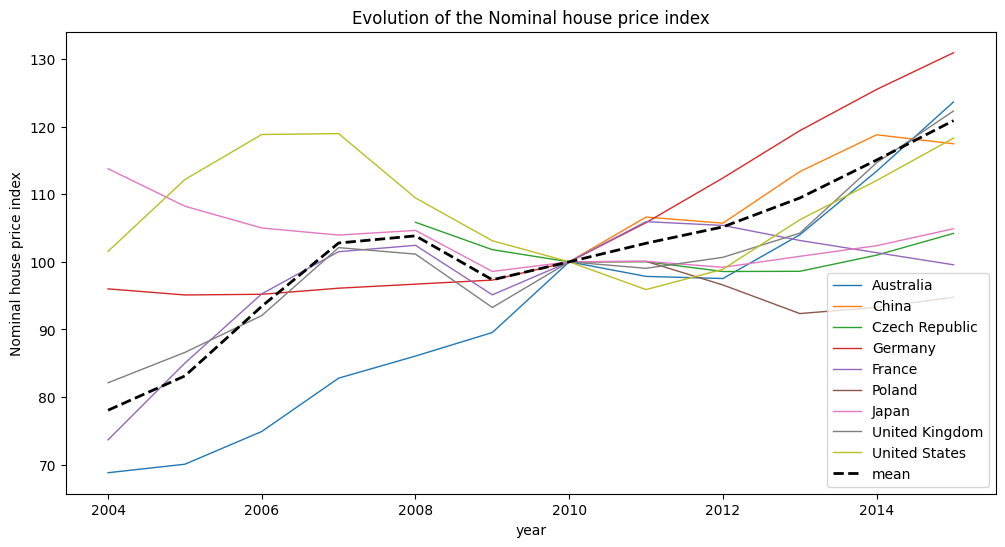

In [8]:
plt.figure(figsize=(12,6))
plt.title("Evolution of the Nominal house price index")

# plot countries
for country in selected_countries:
    name = housing_prices[housing_prices['country_code'] == country]['country_name'].iloc[0]
    plt.plot(housing_prices[housing_prices['country_code'] == country]['year'], housing_prices[housing_prices['country_code'] == country]['value'], label=name, linewidth=1)

# plot yearly mean
housing_mean = housing_prices[['year', 'value']].groupby(['year'], as_index=False).mean()
plt.plot(housing_mean['year'], housing_mean['value'], label='mean', linewidth=2, color='black', linestyle='dashed')

plt.xlabel('year')
plt.ylabel('Nominal house price index')
plt.legend()
plt.show()

Now let's take a look at the `Dealing with construction permits` indicator of the `building_permits` dataset. We will plot the same selected countries and a mean to get a gist of how the difficulty of obtaining a construction permit evolves.

In [9]:
# keep only the nominal house price indicator
building_permits = building_permits[building_permits["indicator_code"] == 'IC.CNST.PRMT.DFRN.DB0615']

# order by year
building_permits = building_permits.sort_values('year')

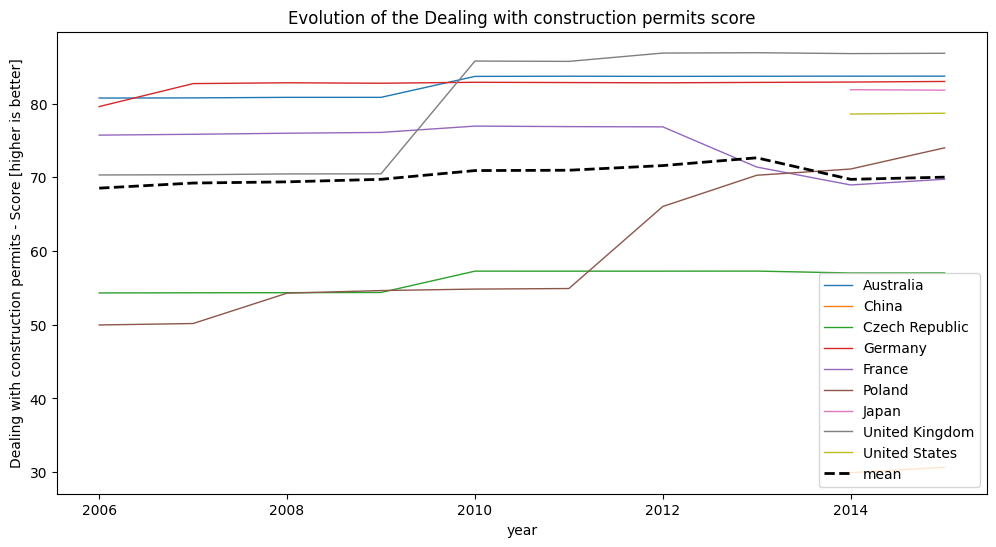

In [10]:
plt.figure(figsize=(12,6))
plt.title("Evolution of the Dealing with construction permits score")

# plot countries
for country in selected_countries:
    name = building_permits[building_permits['country_code'] == country]['country_name'].iloc[0]
    plt.plot(building_permits[building_permits['country_code'] == country]['year'], building_permits[building_permits['country_code'] == country]['value'], label=name, linewidth=1)

# plot yearly mean
permits_mean = building_permits[['year', 'value']].groupby(['year'], as_index=False).mean()
plt.plot(permits_mean['year'], permits_mean['value'], label='mean', linewidth=2, color='black', linestyle='dashed')

plt.xlabel('year')
plt.ylabel('Dealing with construction permits - Score [higher is better]')
plt.legend()
plt.show()

Now let's plot the *Dealing with construction permits - Score* values for the year 2015

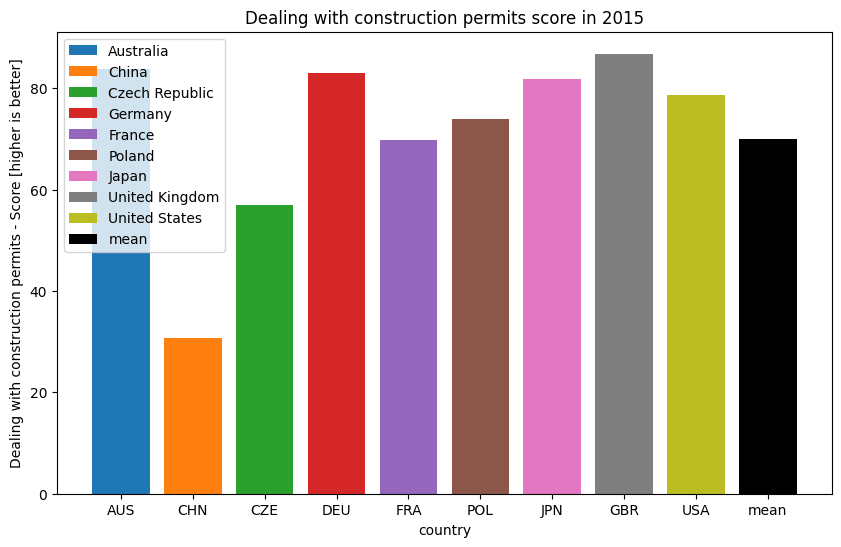

In [11]:
plt.figure(figsize=(10,6))
plt.title("Dealing with construction permits score in 2015")

# plot bar graph for countries and the year 2015
for country in selected_countries:
    name = building_permits[building_permits['country_code'] == country]['country_name'].iloc[0]
    plt.bar(country, building_permits[(building_permits['country_code'] == country) & (building_permits['year'] == 2015)]['value'].iloc[0], label=name)

plt.bar('mean', permits_mean[permits_mean['year'] == 2015]['value'].iloc[0], label='mean', color='black')

plt.xlabel('country')
plt.ylabel('Dealing with construction permits - Score [higher is better]')
plt.legend()
plt.show()

Let's try to visualise the possible relation between the ease of obtaining a building permit and housing prices in 2015.

In [12]:
# only keep values for 2015
housing_prices = housing_prices[housing_prices['year'] == 2015]
building_permits = building_permits[building_permits['year'] == 2015]

merged = pd.merge(housing_prices, building_permits, on="country_code").rename(columns={'value_x': 'house_price_index', 'value_y': 'building_permit_score'})

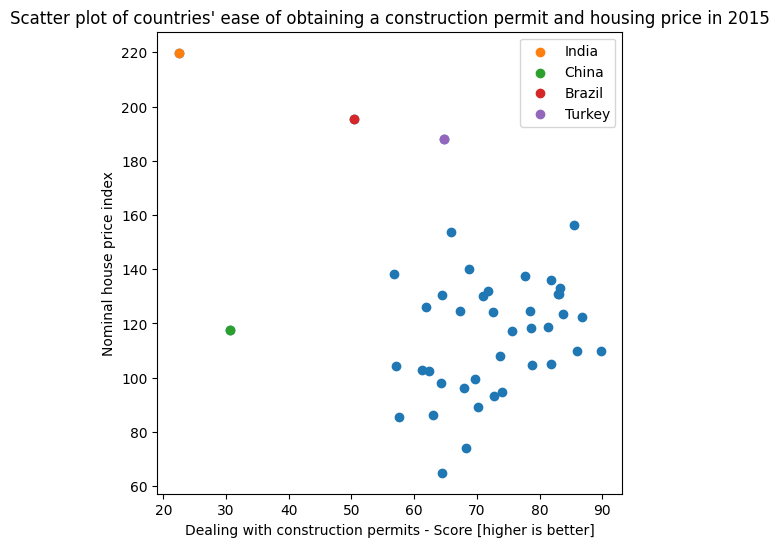

In [13]:
plt.figure(figsize=(6,6))
plt.title("Scatter plot of countries' ease of obtaining a construction permit and housing price in 2015")

# plot bar graph for countries and the year 2015
plt.scatter(merged['building_permit_score'], merged['house_price_index'])

outliers = ['IND', 'CHN', 'BRA', 'TUR']
for outlier in outliers:
    outlier_data = merged[merged['country_code'] == outlier]
    plt.scatter(outlier_data['building_permit_score'], outlier_data['house_price_index'], label=outlier_data['country_name_x'].iloc[0])

plt.xlabel('Dealing with construction permits - Score [higher is better]')
plt.ylabel('Nominal house price index')
plt.legend()
plt.show()

Now to obtain a numerical value for the possible relation between the housing prices and the ease of obtaining a building permit, we will compute the *(pearson)* correlation coefficient.
For further insight we will also compute the coefficient after removing outlier countries *(India, China, Brazil, Turkey)*.

In [14]:
correlation = merged[['building_permit_score', 'house_price_index']].corr().iloc[0,1]
# weak negative correlation between construction permits and housing price -> with increasing ease of obtaining a permit, the price decreases
without_outliers = merged[~merged['country_code'].isin(outliers)]
correlation_without_outliers = without_outliers[['building_permit_score', 'house_price_index']].corr().iloc[0,1]

print("The correlation coefficient between the ease of obtaining construction permits score and the housing prices is {:.3f} and {:.3f} after removing outliers.".format(correlation, correlation_without_outliers))
# weak positive correlation between construction permits and housing price -> with increasing ease of obtaining a permit, the price decreases

The correlation coefficient between the ease of obtaining construction permits score and the housing prices is -0.277 and 0.321 after removing outliers.


### Discussion

1) Evolution of the Dealing with construction permits score

This plot provides the evolution of housing prices over the years for a selected number of countries with a focus on Europe and major economies outside of Europe. The mean value over all countries is provided as well.

We can see that on average the housing prices are steadily increasing with the dip in the year *2009*, presumably as a consequence of the Global Financial Crisis in the years 2007-2008.

2) Evolution of the Dealing with construction permits score

This plot provides the evolution of the *Dealing with construction permits score* evolution over the years, and we can see that the trend is mostly a stagnation or a slight increase in construction permits scores.

3) Dealing with construction permits score in 2015

This bar plots provided the overview of the *Dealing with construction permits score* values of the last year in the observed period for previously selected countries.

4) Scatter plot of countries' ease of obtaining a construction permit and housing price in 2015

This scatter plot provides a convenient visual aid for assessing the relation between the *Dealing with construction permits score* and the *Nominal house price index*.

We can immediately see 4 outlier countries (**India**, **China**, **Brazil** and **Turkey**) which are highlighted in the plot. Other than that the countries are packed in the range **55-98** of the *Dealing with construction permits score* and **60-160** in the *Nominal house price index*. No strong correlation between the ease of obtaining a building permit and the housing prices can be seen from the plot.

5) Correlation coefficients

The correlation coefficient between the ease of obtaining construction permits score and the housing prices is -0.277 and 0.321 after removing outliers. This supports the conclusion that no significant correlation exists between the 2 observed indicator from the previous plot.

#### Conclusion

The cost of housing is a complex topic influenced by a multitude of factors, we examined the possible effect of the ease/difficulty of obtaining a building permit on the housing prices among 43 countries. **We did not find a strong correlation** between the two from which we conclude that the hypothesis of negative correlation between the ease of obtaining a building permit and the housing prices is either flawed or this view is just too simplistic.

#### Limitations

The main limitation of the work is comparing the ease of obtaining a construction permit in a **business setting** with **residential** housing prices. And while we expect the ease of obtaining a construction permit for a business site and residential housing to correlate strongly, we have no objective proof of this.

#### Questions for further research

1) Replication of the project, examining the ease of obtaining **residential** building permits.
2) Replication of the project with newer data.
3) Examination of the relation of the ease of obtaining construction permit and the housing prices in respective countries over time. (does the increase of a score lead to a lower housing cost growth?)